In [1]:
#task1:
import mysql.connector as sql

In [3]:
import numpy as np
import pandas as pd

In [5]:
db=sql.connect(host="localhost",user="root",password="sudheera",database="hr")

In [7]:
mycursor=db.cursor()

In [69]:
query = "SELECT DISTINCT country_name, region_id FROM countries"

In [71]:
mycursor.execute(query)
data3=mycursor.fetchall()
print(data3)

[('Argentina', 2), ('Australia', 3), ('Belgium', 1), ('Brazil', 2), ('Canada', 2), ('Switzerland', 1), ('China', 3), ('Germany', 1), ('Denmark', 1), ('Egypt', 4), ('France', 1), ('HongKong', 3), ('Israel', 4), ('India', 3), ('Italy', 1), ('Japan', 3), ('Kuwait', 4), ('Mexico', 2), ('Nigeria', 4), ('Netherlands', 1), ('Singapore', 3), ('United Kingdom', 1), ('United States of America', 2), ('Zambia', 4), ('Zimbabwe', 4)]


In [73]:
df = pd.DataFrame(data3, columns=['country_name', 'region'])

print(df)

                country_name  region
0                  Argentina       2
1                  Australia       3
2                    Belgium       1
3                     Brazil       2
4                     Canada       2
5                Switzerland       1
6                      China       3
7                    Germany       1
8                    Denmark       1
9                      Egypt       4
10                    France       1
11                  HongKong       3
12                    Israel       4
13                     India       3
14                     Italy       1
15                     Japan       3
16                    Kuwait       4
17                    Mexico       2
18                   Nigeria       4
19               Netherlands       1
20                 Singapore       3
21            United Kingdom       1
22  United States of America       2
23                    Zambia       4
24                  Zimbabwe       4


In [88]:
#task2
import pandas as pd
import mysql.connector
from sqlalchemy import create_engine

hostname = "localhost"
username = "root"
password = "sudheera"
dbname = "hr"

# Create SQLAlchemy engine to connect to MySQL Database
engine = create_engine('mysql+pymysql://{user}:{password}@{host}/{db}'.format(
    host=hostname,
    user=username,
    password=password,
    db=dbname
))

# Read data from tables
employees_df = pd.read_sql("SELECT employee_id, department_id FROM employees", engine)
departments_df = pd.read_sql("SELECT department_id, location_id FROM departments", engine)
locations_df = pd.read_sql("SELECT location_id,city, country_id FROM locations", engine)
countries_df = pd.read_sql("SELECT country_id, country_name FROM countries", engine)

# Join the tables
merged_df = employees_df.merge(departments_df, on='department_id')
merged_df = merged_df.merge(locations_df, on='location_id')
merged_df = merged_df.merge(countries_df, on='country_id')

# Aggregate data by counting employees in each country
aggregated_df = merged_df.groupby('country_name').size().reset_index(name='employee_count')

# Create a new table in the database
aggregated_df.to_sql('country_employee_countss', engine, index=False)

print(aggregated_df)


               country_name  employee_count
0                    Canada               2
1                   Germany               1
2            United Kingdom              35
3  United States of America              68


In [100]:
#task3
import pandas as pd
import mysql.connector
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

country_counts = merged_df.groupby('country_id').size().reset_index(name='employee_count')
city_counts = merged_df.groupby('city').size().reset_index(name='employee_count')

print(country_counts)
print(city_counts)

  country_id  employee_count
0         CA               2
1         DE               1
2         UK              35
3         US              68
                  city  employee_count
0               London               1
1               Munich               1
2               Oxford              34
3              Seattle              18
4  South San Francisco              45
5            Southlake               5
6              Toronto               2


In [102]:
country_counts.to_csv('country_employee_counts.csv', index=False)
city_counts.to_csv('city_employee_counts.csv', index=False)

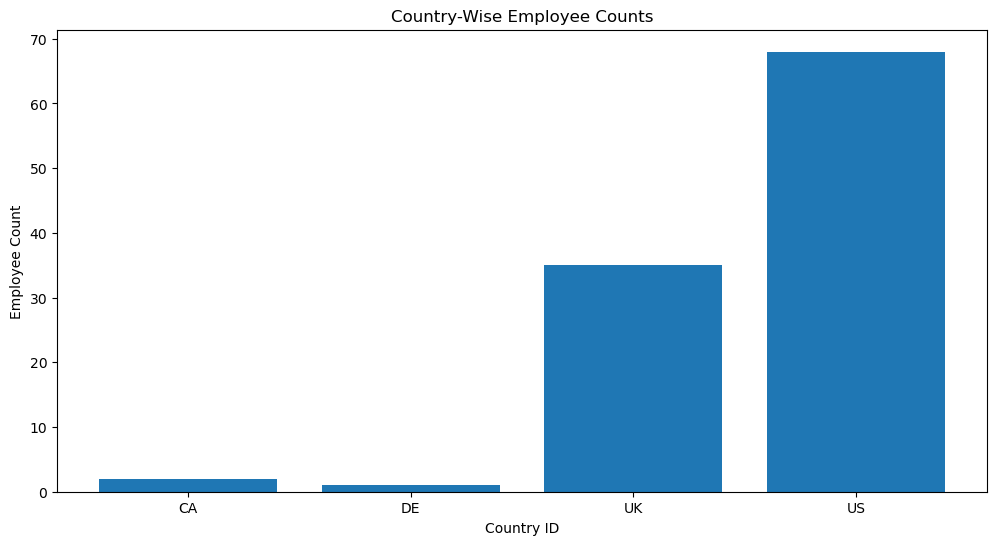

In [104]:
plt.figure(figsize=(12, 6))
plt.bar(country_counts['country_id'], country_counts['employee_count'])
plt.xlabel('Country ID')
plt.ylabel('Employee Count')
plt.title('Country-Wise Employee Counts')
plt.show()

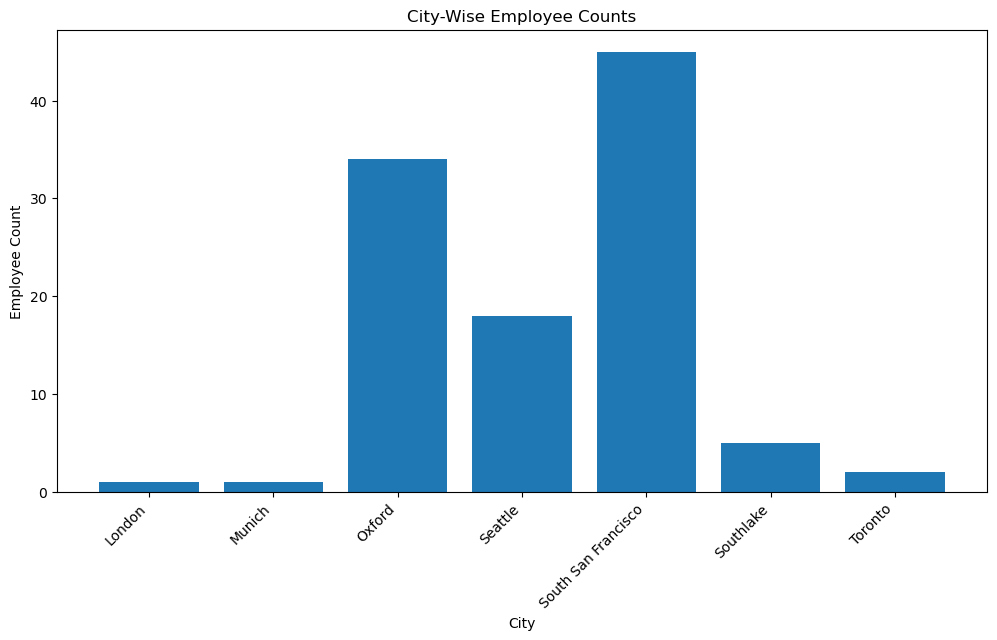

In [106]:
# Plot the city-wise employee counts
plt.figure(figsize=(12, 6))
plt.bar(city_counts['city'], city_counts['employee_count'])
plt.xlabel('City')
plt.ylabel('Employee Count')
plt.title('City-Wise Employee Counts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()